#### Bibliotecas

In [15]:
library(dplyr)
library(magrittr)
library(ggplot2)
library(extrafont)

#### Configurações de tela

In [16]:
options(digits = 4, scipen = 100)
windowsFonts(Times = windowsFont("TT Times New Roman"))
options(repr.plot.width = 9, repr.plot.height = 5)

#### Importando os dados

In [17]:
#Dados de 2019
uniao_19 = read.csv("uniao_19.csv")

#Dados de 2020
uniao_20 = read.csv("uniao_20.csv")

#### Analisando os índices de rotatividade em hospitais públicos e privados no Estado da Paraí­ba

#### 1.1 Índices de rotatividade por hospital

In [18]:
d0 = uniao_19 %>% 
  group_by(PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) %>%
  arrange(-sumdez)
  
#Para 2020
d1 = uniao_20 %>% 
  group_by(PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) %>%
  arrange(-sumdez)

uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)


uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                  labels = c("Privado", "Público")))


#### 1.2  Análise gráfica dos índices de rotatividade por hospital

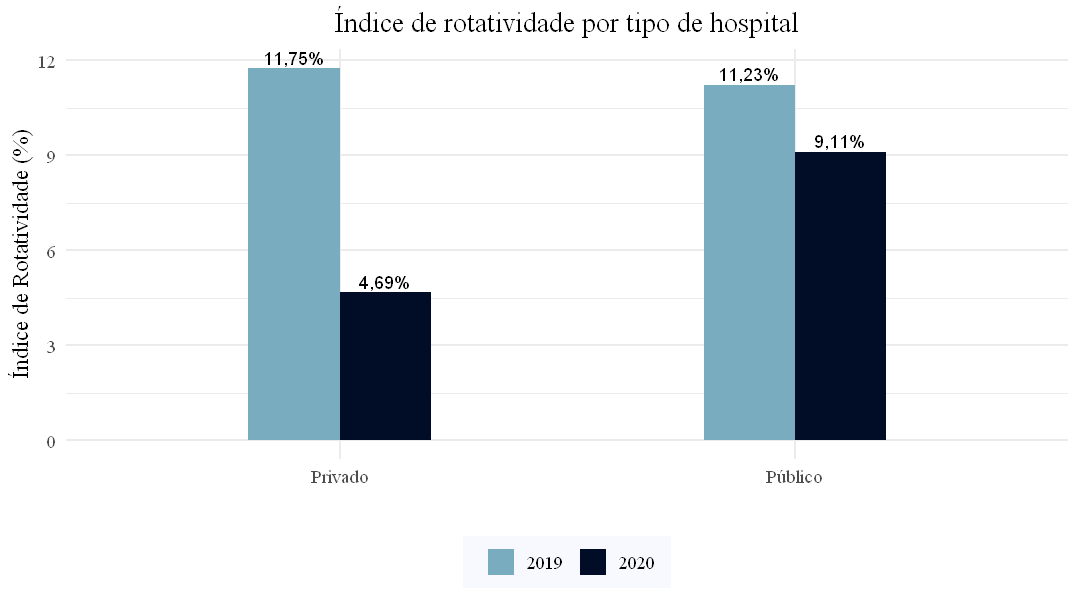

In [19]:
ggplot(uniao, aes(x=as.factor(PUBLICO), y=ind_r, fill=ano)) +
  geom_bar(stat="identity", position=position_dodge(), width=0.4)+
  geom_text(aes(label = porc), position = position_dodge(0.4),
            vjust = -0.3, hjust = 0.5, size = 3.8, color = "black") +
  theme_minimal(base_family = "Times New Roman", base_size = 14) +
  theme(legend.position = "bottom",
        legend.background = element_rect(fill="ghostwhite", size=0.7, 
                                         linetype="blank"),
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(values = c("#7AACBF", "#010D26")) +
  labs(x = "", y = "Índice de Rotatividade (%)",
      title = "Índice de rotatividade por tipo de hospital",
      fill = "")

#### 2.1 Índices de rotatividade para as mesorregiões de acordo

In [ ]:
#Para 2019
d0 = uniao_19 %>% 
  group_by(PUBLICO, meso_trab) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) %>%
  arrange(-sumdez)
  
#Para 2020
d1 = uniao_20 %>% 
  group_by(PUBLICO, meso_trab) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) %>%
  arrange(-sumdez)

uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)


uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                  labels = c("Privado", "Público")))

#### 2.2 Análise gráfica dos índices de rotatividade por hospital e mesorregião

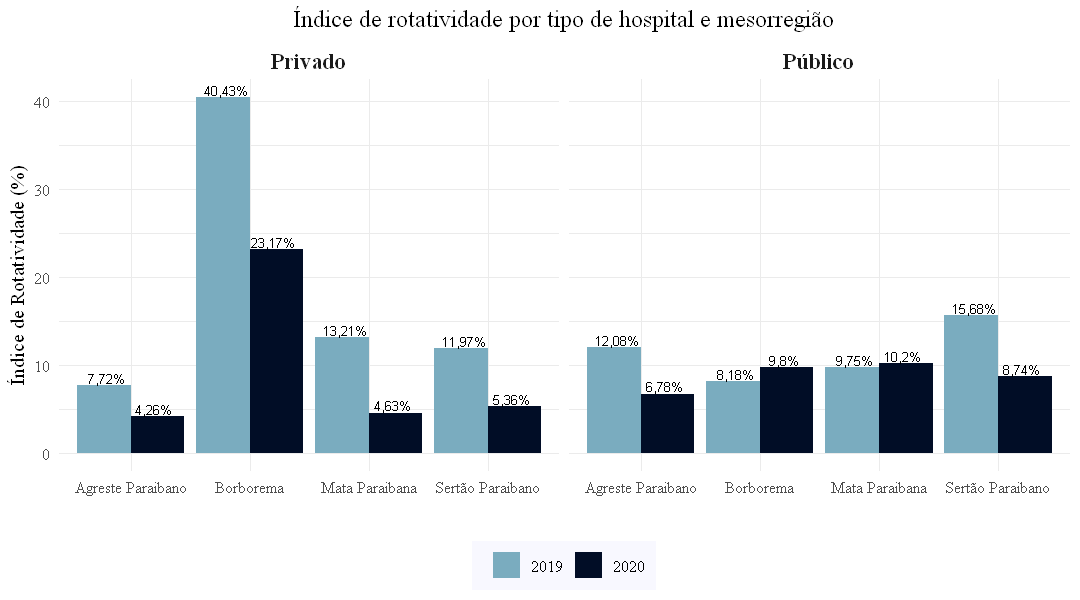

In [21]:
ggplot(uniao, aes(x=as.factor(meso_trab), y=ind_r, fill=ano)) +
  geom_bar(position = "dodge", stat = "identity", width=0.9) +
  facet_wrap(~as.factor(PUBLICO)) +
  geom_text(aes(label = porc), size = 2.8, color = "black",
            vjust = -0.2, position = position_dodge(0.8)) +
  theme_minimal(base_family = "Times New Roman", base_size = 12) +
  theme(axis.text.x = element_text(hjust =0.5),
        legend.position = "bottom",
        legend.background = element_rect(fill="ghostwhite",
        size=0.7,  linetype="blank"),
        strip.text = element_text(size = 13, face = "bold"),
        plot.title = element_text(hjust = 0.5)) +
        scale_fill_manual(values = c("#7AACBF", "#010D26")) +
 labs(x = "", y = "Índice de Rotatividade (%)",
     fill = "",
     title = "Índice de rotatividade por tipo de hospital e mesorregião")


#### 3.1 Índice de rotatividade por carga horária e tipo de hospital

In [ ]:
d0 = uniao_19 %>% 
  group_by(D_HORAS, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) 

#Para 2020
d1 = uniao_20 %>% 
  group_by(D_HORAS, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) 

uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)

uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                                   labels = c("Privado", "Público")))

uniao %<>% mutate(D_HORAS = factor(D_HORAS, levels= c(1, 2,3,4),
                                   labels = c("Até 10 horas", "11h a 20 horas",
                                              "21h a 30 horas",
                                              "31 horas ou mais")))

#### 2.2 Análise gráfica dos índices de rotatividades por carga horária e tipo de hospital

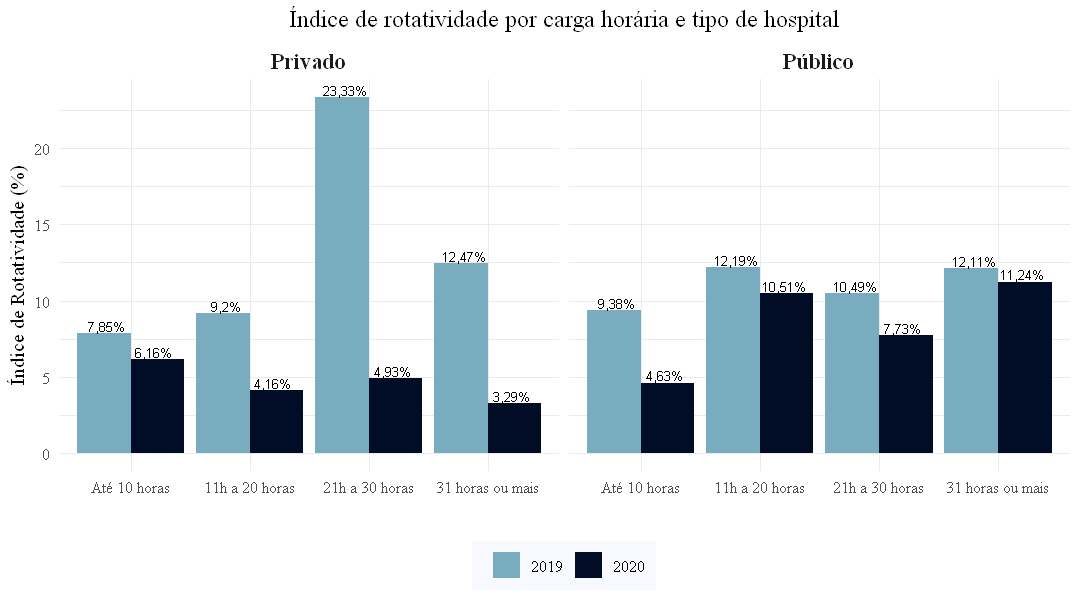

In [23]:
ggplot(uniao, aes(x=as.factor(D_HORAS), y=ind_r, fill=ano)) +
  geom_bar(position = "dodge", stat = "identity", width=0.9) +
  facet_wrap(~as.factor(PUBLICO) ) +
  geom_text(aes(label = porc), size = 2.8, color = "black",
            vjust = -0.2, position = position_dodge(0.8)) +
  theme_minimal(base_family = "Times New Roman", base_size = 12) + 
  theme(axis.text.x = element_text(hjust =0.5),
        legend.position = "bottom",
        legend.background = element_rect(fill= "ghostwhite",
                                         size=0.7,  linetype="blank"),
        plot.title = element_text(hjust = 0.5),
        strip.text = element_text(size = 13, face = "bold")) +
  scale_fill_manual(values = c("#7AACBF", "#010D26")) +
  labs(x = "", y = "Índice de Rotatividade (%)",
       fill = "",
       title = "Índice de rotatividade por carga horária e tipo de hospital")

#### 3.1 Índice de rotatividade por profissão e tipo de hospital:

In [ ]:
#Para 2019
d0 = uniao_19 %>% 
  group_by(PROFISSAO, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) %>%
  filter(PROFISSAO == "Técnico de enfermagem" | PROFISSAO == "Médico" | PROFISSAO == "Enfermeiro" | PROFISSAO == "Fisioterapeuta"| PROFISSAO == "Farmacêutico")

#Para 2020
d1 = uniao_20 %>% 
  group_by(PUBLICO, PROFISSAO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) %>%
  filter(PROFISSAO == "Técnico de enfermagem" | PROFISSAO == "Médico" | PROFISSAO == "Enfermeiro" | PROFISSAO == "Fisioterapeuta"| PROFISSAO == "Farmacêutico")


uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)

uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                                   labels = c("Privado", "Público")))

#### 3.2 Análise gráfica dos índices de rotatividades por profissão e tipo de hospital

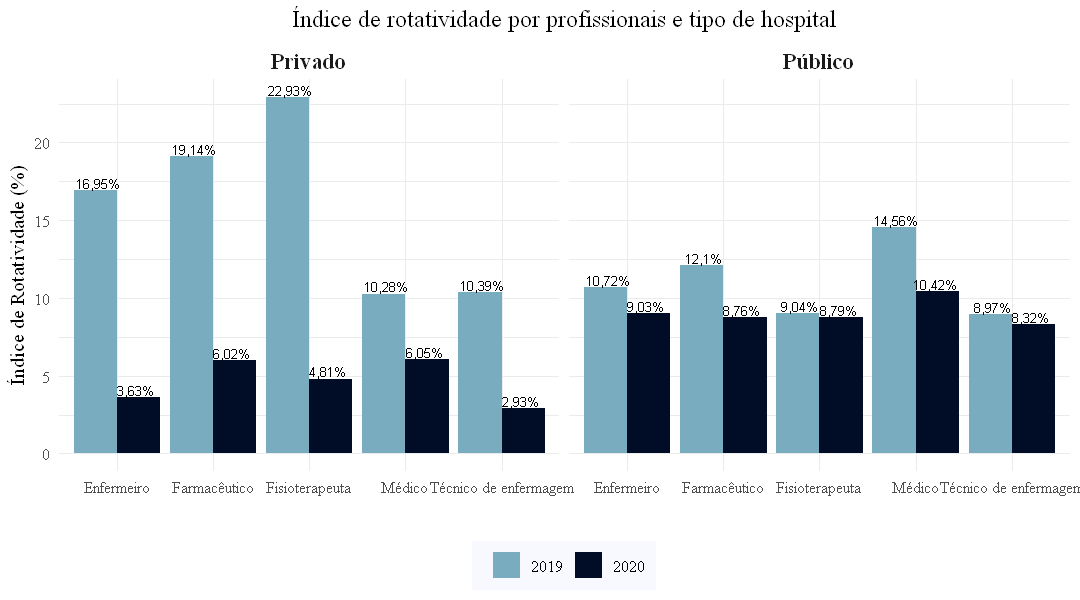

In [25]:
ggplot(uniao, aes(x=as.factor(PROFISSAO), y=ind_r, fill=ano)) +
  geom_bar(position = "dodge", stat = "identity", width=0.9) +
  facet_wrap(~as.factor(PUBLICO) ) +
  geom_text(aes(label = porc), size = 2.8, color = "black",
            vjust = -0.2, position = position_dodge(0.8)) +
  theme_minimal(base_family = "Times New Roman", base_size = 12) + 
  theme(axis.text.x = element_text(hjust =0.5),
        legend.position = "bottom",
        legend.background = element_rect(fill="ghostwhite", size=0.7,  
                                        linetype="blank"),
        strip.text = element_text(size = 13, face = "bold"),
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(values = c("#7AACBF", "#010D26")) +
  labs(x = "", y = "Índice de Rotatividade (%)",
       fill = "",
       title = "Índice de rotatividade por profissionais e tipo de hospital")

#### 4.1 Índice de rotatividade por porte e tipo de hospital:

In [ ]:
#Para 2019
d0 = uniao_19 %>% 
  group_by(PORTE, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) 

#Para 2020
d1 = uniao_20 %>% 
  group_by(PORTE, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) 

uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)

uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                                   labels = c("Privado", "Público")))

uniao %<>% mutate(PORTE = factor(PORTE, levels= c(1, 2,3),
                                 labels = c("Pequeno", "Médio",
                                            "Grande")))

#### 4.2 Análise gráfica dos índices de rotatividades por porte e tipo de hospital

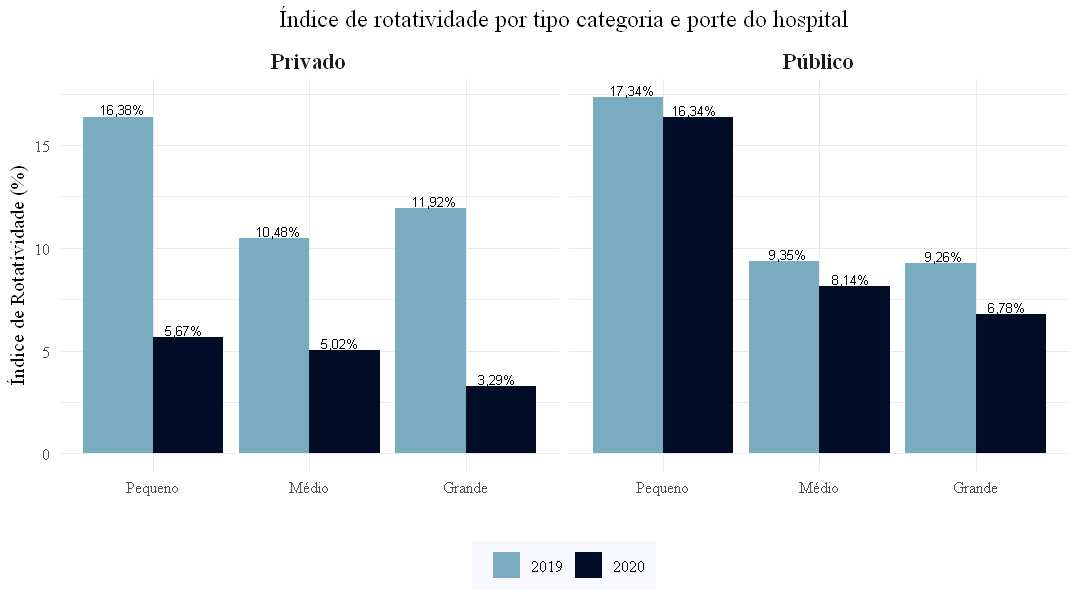

In [27]:
ggplot(uniao, aes(x=as.factor(PORTE), y=ind_r, fill=ano)) +
  geom_bar(position = "dodge", stat = "identity", width=0.9) +
  facet_wrap(~as.factor(PUBLICO) ) +
  geom_text(aes(label = porc), size = 2.8, color = "black",
            vjust = -0.2, position = position_dodge(0.8)) +
  theme_minimal(base_family = "Times New Roman", base_size = 12) + 
  theme(axis.text.x = element_text(hjust =0.5),
        legend.position = "bottom",
        legend.background = element_rect(fill="ghostwhite", 
                                        size=0.7,  linetype="blank"),
        strip.text = element_text(size = 13, face = "bold"), 
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(values = c("#7AACBF", "#010D26")) +
  labs(x = "", y = "Índice de Rotatividade (%)",
       fill = "", 
       title = "Índice de rotatividade por tipo categoria e porte do hospital")

#### 5.1 Índice de rotatividade por vínculos trabalhistas e tipo de hospital:

In [ ]:
d0 = uniao_19 %>% 
  group_by(D_VINC, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2019)) 

d1 = uniao_20 %>% 
  group_by(D_VINC, PUBLICO) %>%
  summarise(sumdez = sum(tempo == "1"),
            sumrotat = sum(rotat == "1"),
            mediarot = sumrotat/2,
            ind_r = (mediarot/sumdez)*100) %>%
  mutate(ano = as.factor(2020)) 

uniao = rbind(d0, d1) %>%
  mutate(ind_r = round(ind_r, 2),
         porc = paste0(ind_r, "%"))

uniao$porc = gsub("\\.", ",", uniao$porc)

uniao %<>% mutate(PUBLICO = factor(PUBLICO, levels= c(0, 1),
                                   labels = c("Privado", "Público")))

#### 5.2 Análise gráfica dos índices de rotatividades por vínculos e tipo de hospital

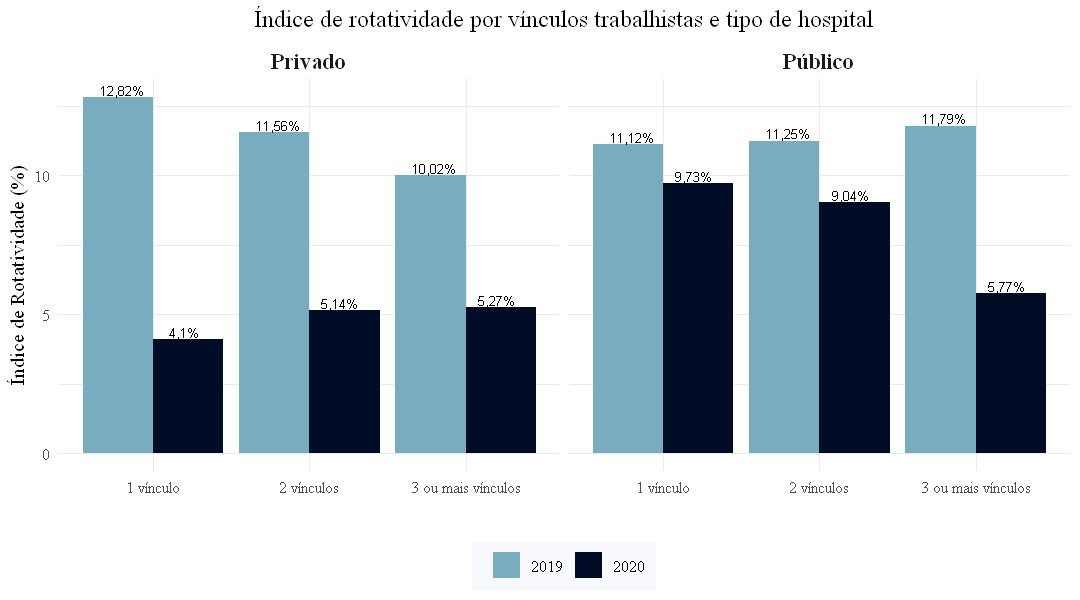

In [29]:
ggplot(uniao, aes(x=as.factor(D_VINC), y=ind_r, fill=ano)) +
  geom_bar(position = "dodge", stat = "identity", width=0.9) +
  facet_wrap(~as.factor(PUBLICO) ) +
  geom_text(aes(label = porc), size = 2.8, color = "black",
            vjust = -0.2, position = position_dodge(0.8)) +
  theme_minimal(base_family = "Times New Roman", base_size = 12) + 
  theme(axis.text.x = element_text(hjust =0.5),
        legend.position = "bottom",
        legend.background = element_rect(fill="ghostwhite", size=0.7,  linetype="blank"),
        plot.title = element_text(hjust = 0.5),
        strip.text = element_text(size = 13, face = "bold")) +
  scale_fill_manual(values = c("#7AACBF", "#010D26")) +
  labs(x = "", y = "Índice de Rotatividade (%)",
       fill = "", 
       title = "Índice de rotatividade por vínculos trabalhistas e tipo de hospital")